# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [72]:
#Bibiliotecas que serão utilizadas
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [55]:
df = pd.read_csv('df_dummies.csv')
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,58.832877,3.106849,1,0,0,0,2.0,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False
...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True
16646,0,43.389041,7.380822,1,1,1,0,2.0,True
16647,0,30.005479,9.800000,1,1,0,0,2.0,True
16648,0,30.005479,9.800000,1,1,0,0,2.0,True


In [56]:
X = df.drop('mau', axis = 1) #usa-se parenteses porque estamos usando uma função 'drop'
y = df['mau'] # usa-se colchetes porque estamos selecionando a variál resposta ou target

Nesse exemplo, a função train_test_split (importada no início do notebook) recebe os seguintes parâmetros:

X: DataFrame contendo as variáveis explicativas, ou seja, todas as colunas exceto a variável resposta, uma vez que a variável 'mau' foi dropada do DataFrame original.
y: Série ou array contendo a variável resposta, no caso 'mau'
test_size: A proporção desejada para o conjunto de validação, neste caso, 30% (0.3) dos dados serão usados para validação. Ou seja, 70% para treino e 30% para teste.
random_state: O estado do gerador de números aleatórios para garantir a reprodutibilidade dos resultados.
Após a separação, você terá os seguintes objetos:

X_train: DataFrame com as variáveis explicativas para treinamento.
X_test: DataFrame com as variáveis explicativas para validação.
y_train: Série ou array com a variável resposta para treinamento.
y_test: Série ou array com a variável resposta para validação.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [58]:
# from sklearn.tree import DecisionTreeClassifier - essa biblioteca já foi importada no início do notebook

# Criando o objeto da árvore de decisão
arvore_decisao = DecisionTreeClassifier()

# Treinando o modelo com os dados de treinamento
arvore_decisao.fit(X_train, y_train)

DecisionTreeClassifier()

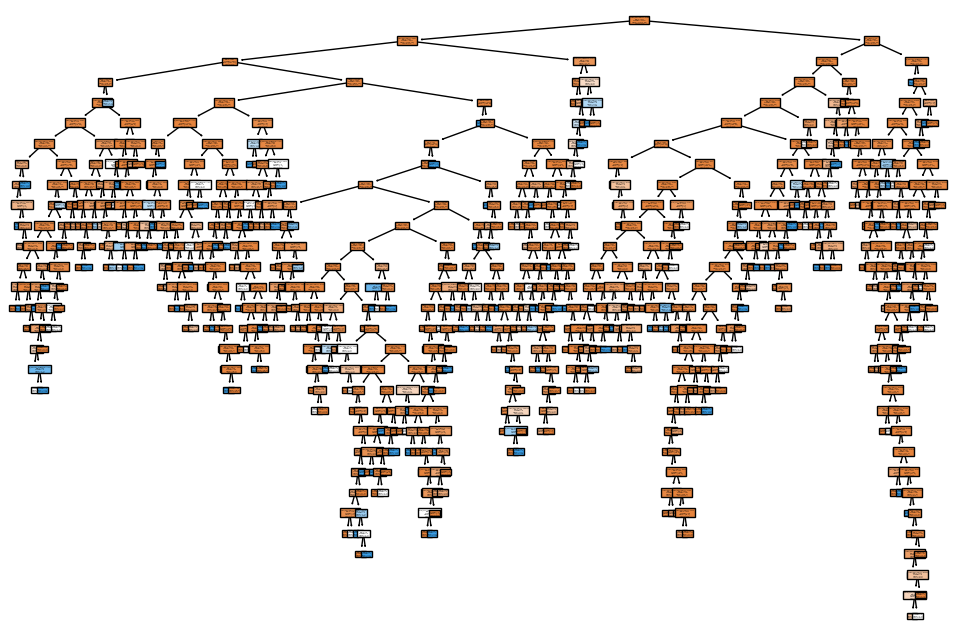

In [59]:
from sklearn import tree
plt.figure(figsize=(12, 8))
tree.plot_tree(arvore_decisao, feature_names=X_train.columns, class_names=[str(c) for c in arvore_decisao.classes_], filled=True)
plt.show()

In [50]:
# Realizando as previsões no conjunto de validação
y_pred = arvore_decisao.predict(X_test)

In [60]:
# Criando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

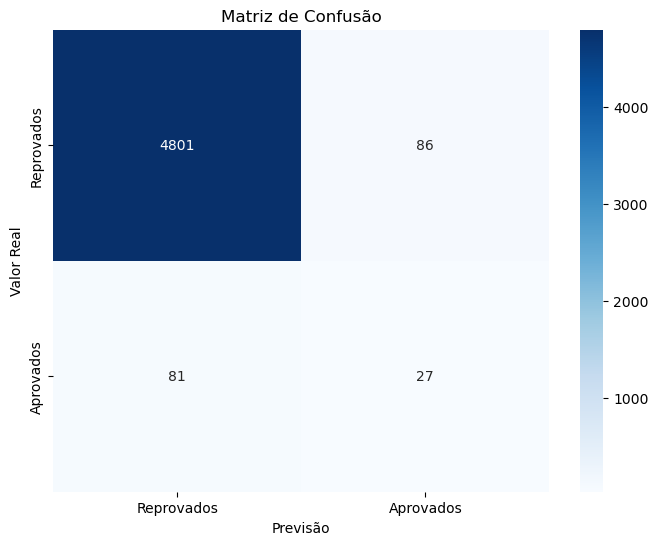

In [61]:
# Definindo os rótulos dos eixos
labels = ['Reprovados', 'Aprovados']

# Criando o mapa de calor da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Definindo os rótulos dos eixos
plt.xlabel('Previsão')
plt.ylabel('Valor Real')

# Defina o título do gráfico
plt.title('Matriz de Confusão')

# Exiba o mapa de calor
plt.show()

In [63]:
from sklearn.metrics import accuracy_score

# Realize as previsões no conjunto de treinamento
y_train_pred = arvore_decisao.predict(X_train)

# Calcule a acurácia
acuracia_train = accuracy_score(y_train, y_train_pred)

print(f"Acurácia na base de treinamento: {acuracia_train:.4f}")

Acurácia na base de treinamento: 0.9900


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [64]:
# Classificar a base de teste
y_test_pred = arvore_decisao.predict(X_test)


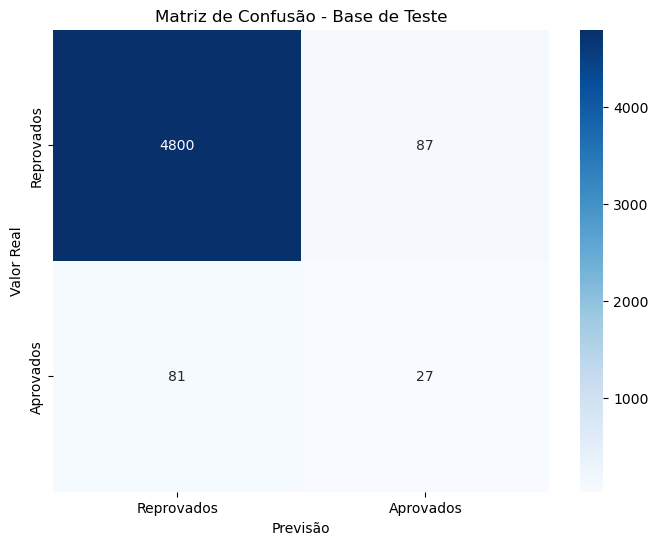

In [66]:
#Criar a matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)

# Definir os rótulos dos eixos
labels = ['Reprovados', 'Aprovados']

# Criar o mapa de calor da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Definir os rótulos dos eixos
plt.xlabel('Previsão')
plt.ylabel('Valor Real')

# Definir o título do gráfico
plt.title('Matriz de Confusão - Base de Teste')

# Exibir o mapa de calor
plt.show()

In [67]:
# Calcular a acurácia da base de teste
acuracia_teste = accuracy_score(y_test, y_test_pred)

# Calcular a acurácia da base de treinamento (previamente calculada)
print(f"Acurácia na base de treinamento: {acuracia_train:.4f}")

# Exibir a acurácia da base de teste
print(f"Acurácia na base de teste: {acuracia_teste:.4f}")

Acurácia na base de treinamento: 0.9900
Acurácia na base de teste: 0.9664


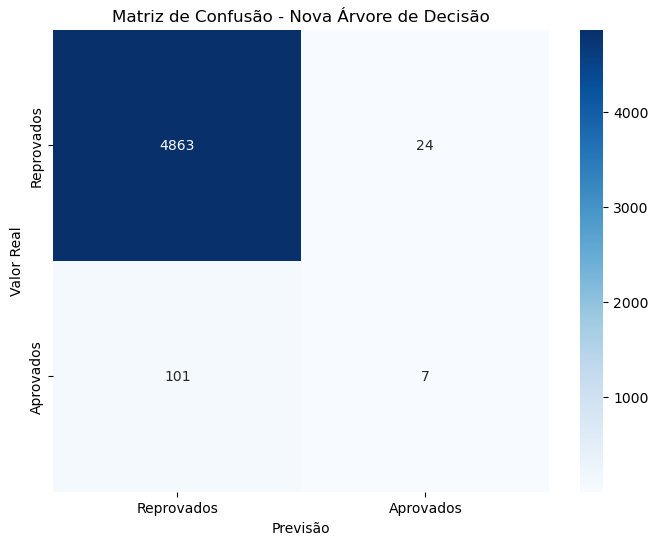

In [68]:
# Criar o objeto da árvore de decisão com os parâmetros desejados
nova_arvore_decisao = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

# Treinar o modelo com os dados de treinamento
nova_arvore_decisao.fit(X_train, y_train)

# Realizar as previsões na base de teste
y_test_pred = nova_arvore_decisao.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)

# Definir os rótulos dos eixos
labels = ['Reprovados', 'Aprovados']

# Exibir a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Nova Árvore de Decisão')
plt.show()

In [70]:
proporcao_maus = sum(y_test_pred == 1) / len(y_test_pred)
print(f"Proporção de proponentes classificados como 'maus': {proporcao_maus:.4f}")


Proporção de proponentes classificados como 'maus': 0.0062


In [73]:
# Criar uma matriz de previsões com todos os valores iguais a 0 (representando "bons")
y_pred_all_good = np.zeros_like(y_test_pred)

# Calcular a acurácia
acuracia_all_good = accuracy_score(y_test, y_pred_all_good)

print(f"Acurácia ao classificar todos os contratos como 'bons': {acuracia_all_good:.4f}")


Acurácia ao classificar todos os contratos como 'bons': 0.9784



#Com o objetivo exclusivo para aprendizado, abaixo um passo a passo de todo o processo para a criação de uma árvore de decisão e as respectivas explicações:

#Agora faremos novamente todo o processo passo a passo.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Dividindo os dados em conjunto de treinamento e teste (70% treinamento, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Criando o objeto da árvore de decisão
arvore_decisao = DecisionTreeClassifier()

# Treinando o modelo com os dados de treinamento
arvore_decisao.fit(X_train, y_train)

# Fazendo previsões usando o modelo treinado
y_pred = arvore_decisao.predict(X_test)

# Calculando a acurácia
acuracia = accuracy_score(y_test, y_pred)

print(f"Acurácia do modelo de árvore de decisão: {acuracia:.4f}")

Nesse código, estamos importando as bibliotecas necessárias: train_test_split para dividir os dados em conjunto de treinamento e teste, DecisionTreeClassifier para criar o objeto do modelo de árvore de decisão e accuracy_score para calcular a acurácia.

Em seguida, usamos a função train_test_split para dividir os dados X e y em conjunto de treinamento (X_train e y_train) e conjunto de teste (X_test e y_test). Definimos o tamanho do conjunto de teste como 30% dos dados totais e usamos um valor fixo de random_state (123) para garantir a reprodutibilidade dos resultados.

Depois disso, criamos o objeto arvore_decisao usando DecisionTreeClassifier. Em seguida, treinamos o modelo chamando o método fit() e passando os dados de treinamento X_train e y_train.

Em seguida, usamos o método predict() para fazer previsões com o modelo treinado usando os dados de teste X_test. A acurácia é calculada usando a função accuracy_score, passando os valores reais da variável alvo (y_test) e as previsões feitas pelo modelo (y_pred).

Finalmente, imprimimos a acurácia do modelo de árvore de decisão no console. Esse valor representa a porcentagem de previsões corretas do modelo nos dados de teste.

# Observações sobre o treinamento/teste X_train, X_test, y_train, y_test:

Usamos as variáveis X_train, X_test, y_train e y_test para realizar a divisão dos dados em conjunto de treinamento e teste.

No contexto do aprendizado de máquina, geralmente temos duas partes principais nos dados: as variáveis explicativas (ou características) e a variável resposta (ou alvo). O conjunto de treinamento é usado para treinar o modelo, ou seja, para ensinar o modelo a fazer previsões com base nos padrões e relacionamentos presentes nas variáveis explicativas em relação à variável resposta. Já o conjunto de teste é usado para avaliar o desempenho do modelo, testando-o em dados não vistos anteriormente.

X_train é usado para armazenar as variáveis explicativas do conjunto de treinamento. É uma matriz que contém os dados das variáveis explicativas para as amostras de treinamento.

X_test é usado para armazenar as variáveis explicativas do conjunto de teste. É uma matriz que contém os dados das variáveis explicativas para as amostras de teste.

y_train é usado para armazenar a variável resposta do conjunto de treinamento. É um vetor (ou matriz unidimensional) que contém os valores reais da variável resposta correspondentes às amostras de treinamento.

y_test é usado para armazenar a variável resposta do conjunto de teste. É um vetor (ou matriz unidimensional) que contém os valores reais da variável resposta correspondentes às amostras de teste.

Ao dividir os dados em conjunto de treinamento e teste, garantimos que o modelo seja treinado em um conjunto de dados independente do conjunto de teste. Dessa forma, podemos avaliar o desempenho do modelo em dados não vistos anteriormente e verificar sua capacidade de generalização.

Usar uma divisão adequada dos dados em conjunto de treinamento e teste é importante para evitar o overfitting (sobreajuste) do modelo aos dados de treinamento e para obter uma estimativa mais realista de seu desempenho em dados futuros.

